In [ ]:
#Antonio Muniz
#22.119.001 - 0

#Atividade 6

Equação: y = 4.318292682926829x -1125.7926829268292


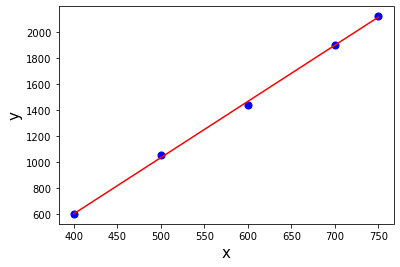

Resíduo: 972.56097560976
Valor da potência para 800 rpm = 2328.841463414634
Valor de rpm para 1650 hp = [642.79864445]


/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [21]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import fsolve

x = np.array([400,500,600,700,750])
y = np.array([600,1050,1440,1900,2120])

n = np.size(x) 
Sx= np.sum(x)
Sy=np.sum(y)
Sxy=np.sum(x*y)
Sxx=np.sum(x*x)   
a1=(n*Sxy-Sx*Sy)/(n*Sxx-Sx**2)   #Calcula o coeficiente a1 da reta
a0=(Sxx*Sy-Sxy*Sx)/(n*Sxx-Sx**2) #Calcula o coeficiente a0 da reta

print("Equação: y = " + str(a1) +"x " + str(a0))

# mostra os dados
plt.scatter(x, y, color = "b", marker= "o", s = 50)
# prediz os valores
y_pred= a0 + a1*x 
# mostra a reta de regressão
plt.plot(x, y_pred, color = "r")

plt.xlabel('x', fontsize= 15)
plt.ylabel('y', fontsize= 15) 
plt.show(True) 

#funcaoque calcula o Residuo
def Residuo(x,y,b0,b1):
    n = len(y)
    RS = 0
    for i in range(0,n):
        y_pred=a0+a1*x[i]
        RS = RS + (y[i]-y_pred)**2
    return RS
print('Resíduo:', Residuo(x,y,a0,a1))

def f(x):
    return (a1*x + a0 - 1650)

result=a1*800 + a0
print("Valor da potência para 800 rpm = " + str(result))
resultado=fsolve(f,1)
print("Valor de rpm para 1650 hp = " + str(resultado))


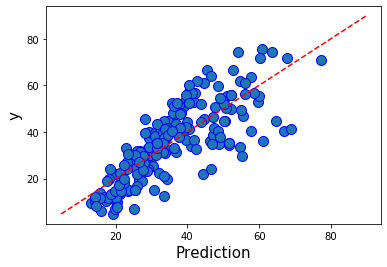

R2: 0.6275531792314851


In [8]:
import pandas as pd
import numpy as np

data = pd.read_csv('concrete_data.csv', header=(0))
ylabel = data.columns[-1]

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.model_selection import train_test_split
# divide o conjunto em treinamento e teste
p = 0.2 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

from sklearn.linear_model import LinearRegression

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

import matplotlib.pyplot as plt
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)
# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)

from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)